In [4]:
import os
import pathlib


import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

from functools import lru_cache

import pandas as pd
import plotly as pt
import panel as pn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.options.plotting.backend = "plotly"


import warnings
warnings.filterwarnings("ignore")

In [5]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
current_date = pd.to_datetime("2022-04-01")
print(color.BOLD +  f"Current Date := {current_date}" + color.END)
print(color.BOLD +  f"===================================" + color.END)

Current Date := 2022-04-01 00:00:00


Importing the complete merged dataset

In [12]:
!git clone https://github.com/PaulaLuisaDroeghoff/COMP0047Data.git


fatal: destination path 'COMP0047Data' already exists and is not an empty directory.


In [15]:
bond_data = pd.read_parquet("COMP0047Data/Bond_Pricing_With_Returns_And_Ratings.parquet")
print(bond_data.columns)

Index(['ISIN', 'CUSIP', 'Ticker', 'Short_name_of_Issuer', 'Currency',
       'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM', 'Ask_YTM',
       'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Tier', 'Coupon_Type', 'Defaulted',
       'Perpetual', 'isCallable', 'Maturity', 'Liquidity_asof', 'MOODYS',
       'SNP', 'instrumentRating.directionOfChange.MOODYS',
       'instrumentRating.directionOfChange.SNP', 'Previous_Mid_Price',
       'Return %'],
      dtype='object')


In [16]:
bond_data

,ISIN,CUSIP,Ticker,Short_name_of_Issuer,Currency,Bid_Price,Mid_Price,Ask_Price,Bid_YTM,Mid_YTM,...,Perpetual,isCallable,Maturity,Liquidity_asof,MOODYS,SNP,instrumentRating.directionOfChange.MOODYS,instrumentRating.directionOfChange.SNP,Previous_Mid_Price,Return %
0,NL0000003580,N4580ZKD8,NETHRS,Kdom Neth,EUR,86.91900,86.99400,87.06900,1.02266,1.01634,...,False,False,5037,2022-03-31,None,None,None,None,96.57600,-9.921720
1,NL0000003531,N4580ZKF3,NETHRS,Kdom Neth,EUR,93.02500,93.10000,93.17500,0.82681,0.81755,...,False,False,3211,2022-03-31,None,None,None,None,99.97100,-6.872993
2,NL0000003572,N4580ZKH9,NETHRS,Kdom Neth,EUR,88.11700,88.19200,88.26700,0.99472,0.98799,...,False,False,4672,2022-03-31,None,None,None,None,97.24300,-9.307611
3,NL0000003523,N81728AH5,NETHRS,Kdom Neth,EUR,94.84992,94.85492,94.85992,0.68186,0.68118,...,False,False,2846,2022-03-31,None,None,None,None,100.66740,-5.773945
4,NL0000003564,N4580ZKJ5,NETHRS,Kdom Neth,EUR,89.23200,89.30700,89.38200,0.97178,0.96457,...,False,False,4307,2022-03-31,None,None,None,None,97.79800,-8.682182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63538,DE000WGZ7VT6,D966BZEL8,DZBK,DZ Bk AG,EUR,102.07868,102.13562,102.19261,0.60013,0.57588,...,False,False,857,2022-03-31,None,None,None,None,104.09941,-1.886456
63539,DE000WGZ8FT7,D966CKBL3,DZBK,DZ Bk AG,EUR,99.75000,99.93250,100.11500,1.27845,1.22084,...,False,False,1193,2022-03-31,None,None,None,None,103.40500,-3.358155
63540,DE000WGZ8NG8,D966CKRG7,DZBK,DZ Bk AG,EUR,100.16022,100.23530,100.31046,0.85515,0.83428,...,False,False,1342,2022-03-31,None,None,None,None,103.54481,-3.196210
63541,DE000WGZ8P49,D966CKWV8,DZBK,DZ Bk AG,EUR,100.48052,100.55795,100.63545,0.86977,0.84890,...,False,False,1382,2022-03-31,None,None,None,None,104.01863,-3.326981


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rating_order = [
    "AAA", "AA+", "AA", "AA-", "A+", "A", "A-",
    "BBB+", "BBB", "BBB-", "BB+", "BB", "BB-",
    "B+", "B", "B-", "CCC", "CC", "C", "D", "NR"
]
rating_map = {r: i+1 for i, r in enumerate(rating_order)}

bond_data = bond_data.copy()
bond_data["rating_num"] = bond_data["SNP"].map(rating_map)
bond_data = bond_data[bond_data["rating_num"].notna()]  # drop unrated or unmapped

bond_data["SNP"] = pd.Categorical(bond_data["SNP"], categories=rating_order, ordered=True)


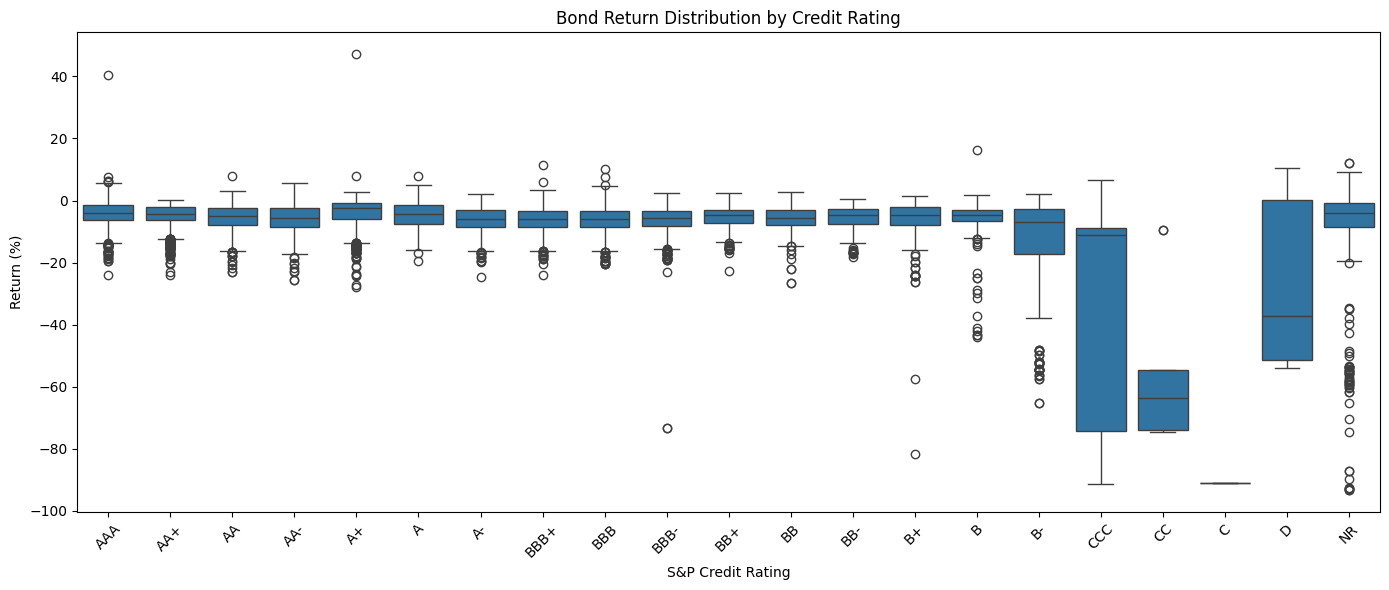

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=bond_data, x="SNP", y="Return %")
plt.xticks(rotation=45)
plt.title("Bond Return Distribution by Credit Rating")
plt.ylabel("Return (%)")
plt.xlabel("S&P Credit Rating")
plt.tight_layout()
plt.show()


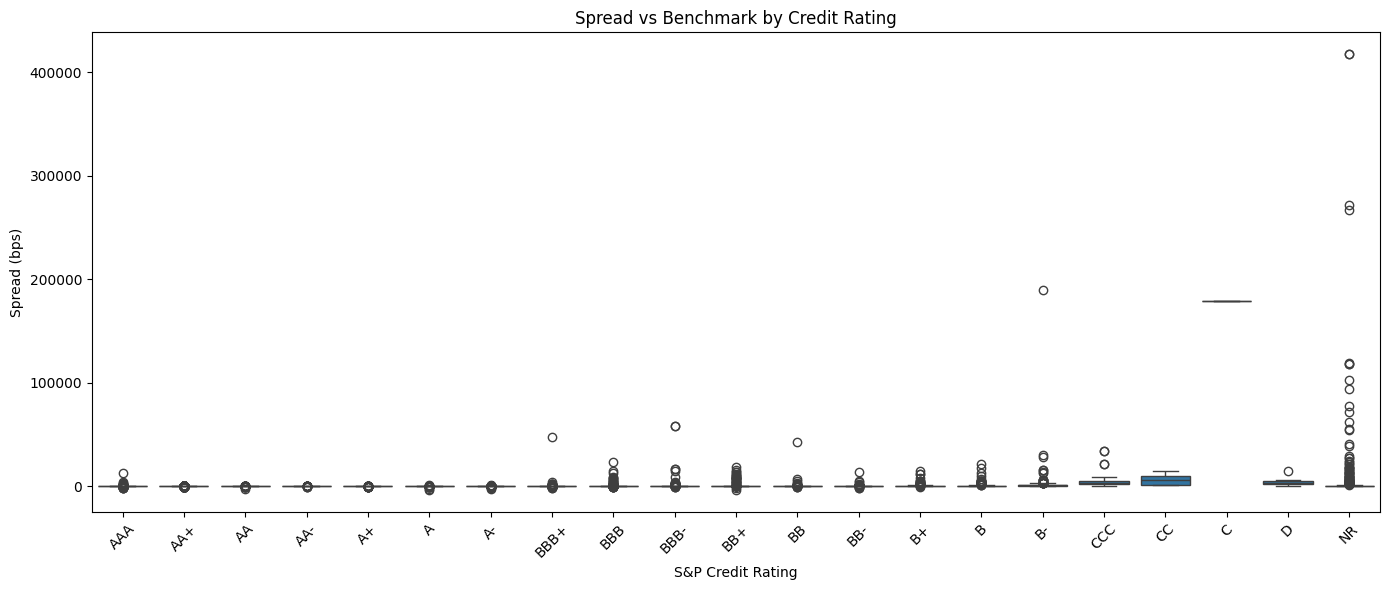

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=bond_data, x="SNP", y="Spread_vs_Benchmark_Mid")
plt.xticks(rotation=45)
plt.title("Spread vs Benchmark by Credit Rating")
plt.ylabel("Spread (bps)")
plt.xlabel("S&P Credit Rating")
plt.tight_layout()
plt.show()


In [23]:
summary_table = bond_data.groupby("SNP")[["Mid_YTM", "Spread_vs_Benchmark_Mid", "Return %"]].agg(["mean", "std", "count"])
print(summary_table)


          Mid_YTM                   Spread_vs_Benchmark_Mid                \
             mean         std count                    mean           std   
SNP                                                                         
AAA      2.401819    4.829570  2136               62.951206    331.203371   
AA+      2.266863    0.862783  2701                7.148074     60.197648   
AA       1.904068    1.620537   974               58.072031     98.700197   
AA-      2.485019    1.270291  1201               75.573177     51.161794   
A+       1.672967    1.484037  3076               53.037951     58.605643   
A        2.324837    1.989044  1770               77.819538    128.597047   
A-       2.837150    1.434317  2278              106.279331     95.554073   
BBB+     3.389093    8.693095  3165              150.845548    861.014294   
BBB      3.919713    7.500262  2455              209.642104    736.290065   
BBB-     5.282467   22.313680  1572              345.694296   2224.251286   

In [27]:
# get isins

isins = bond_data["ISIN"]

print(isins)

9        AU0000002073
87       XS2100005771
88       XS2100001192
2644     KZ2C00003002
2928     XS2210006339
             ...     
63522    CA44889ZBX39
63523    CA44889ZCE49
63524    CA44889ZET99
63525    CA44889ZBU99
63527    CA66989ZEG96
Name: ISIN, Length: 23552, dtype: object


In [28]:
# get numeric columns only
numeric_columns = bond_data.select_dtypes(include=["number"]).columns
print(numeric_columns)

numeric_bond_data = bond_data[numeric_columns]
numeric_bond_data

# combine with isins
numeric_bond_data = pd.concat([isins, numeric_bond_data], axis=1)
numeric_bond_data

Index(['Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM', 'Ask_YTM',
       'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return %',
       'rating_num'],
      dtype='object')


,ISIN,Bid_Price,Mid_Price,Ask_Price,Bid_YTM,Mid_YTM,Ask_YTM,Bid_Ask_Price_Spread,Dirty_Bid_Price,Dirty_Mid_Price,...,Mid_Convexity,Ask_Convexity,Mid_Z_Spread,Spread_vs_Benchmark_Bid,Spread_vs_Benchmark_Mid,Spread_vs_Benchmark_Ask,Maturity,Previous_Mid_Price,Return %,rating_num
9,AU0000002073,101.27922,101.32972,101.38022,1.39587,1.34106,1.28629,0.10100,101.50168,101.55218,...,1.34950,1.35024,18.81055,31.59785,28.98544,26.37600,340,102.68527,-1.320102,1.0
87,XS2100005771,14.12656,14.45781,14.78906,556.43932,545.58401,535.10335,0.66250,16.75469,17.08594,...,0.07165,0.07383,26027.20629,55401.51907,54316.41442,53268.77474,283,23.98490,-39.721200,21.0
88,XS2100001192,97.79000,97.81500,97.84000,2.53994,2.53086,2.52179,0.05000,97.90027,97.92527,...,10.91501,10.91698,-18.84973,6.52663,7.06693,7.60755,1077,100.66900,-2.835034,1.0
2644,KZ2C00003002,86.17503,86.29733,86.41985,14.41116,14.35008,14.28900,0.24482,88.34303,88.46533,...,7.17297,7.17805,106.55136,317.87473,313.37473,308.87473,1003,92.32912,-6.532923,21.0
2928,XS2210006339,70.00000,71.36500,72.73000,1.87531,1.79969,1.72564,2.73000,70.34384,71.70884,...,729.81589,731.93739,71.80675,123.25183,115.84297,108.59098,10345,90.56000,-21.195892,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63522,CA44889ZBX39,75.91200,76.02661,76.14141,3.18848,3.17075,3.15302,0.22941,75.91200,76.02661,...,1.88267,1.88073,23.22863,75.99052,74.49052,72.99052,3212,82.52354,-7.872820,4.0
63523,CA44889ZCE49,67.02671,67.16029,67.29416,3.31147,3.29472,3.27798,0.26746,67.02671,67.16029,...,0.77594,0.77469,28.98933,83.04627,81.54627,80.04627,4489,74.63534,-10.015430,4.0
63524,CA44889ZET99,98.35276,98.48908,98.62561,2.82251,2.79231,2.76211,0.27285,98.58013,98.71645,...,24.37933,24.38813,-7.57722,38.86651,36.36651,33.86651,1796,105.13957,-6.325392,4.0
63525,CA44889ZBU99,80.13028,80.23067,80.33120,3.08934,3.07161,3.05388,0.20093,80.13028,80.23067,...,0.65275,0.65218,16.44649,66.07623,64.57623,63.07623,2663,86.39647,-7.136634,4.0


## Correlation heatmap

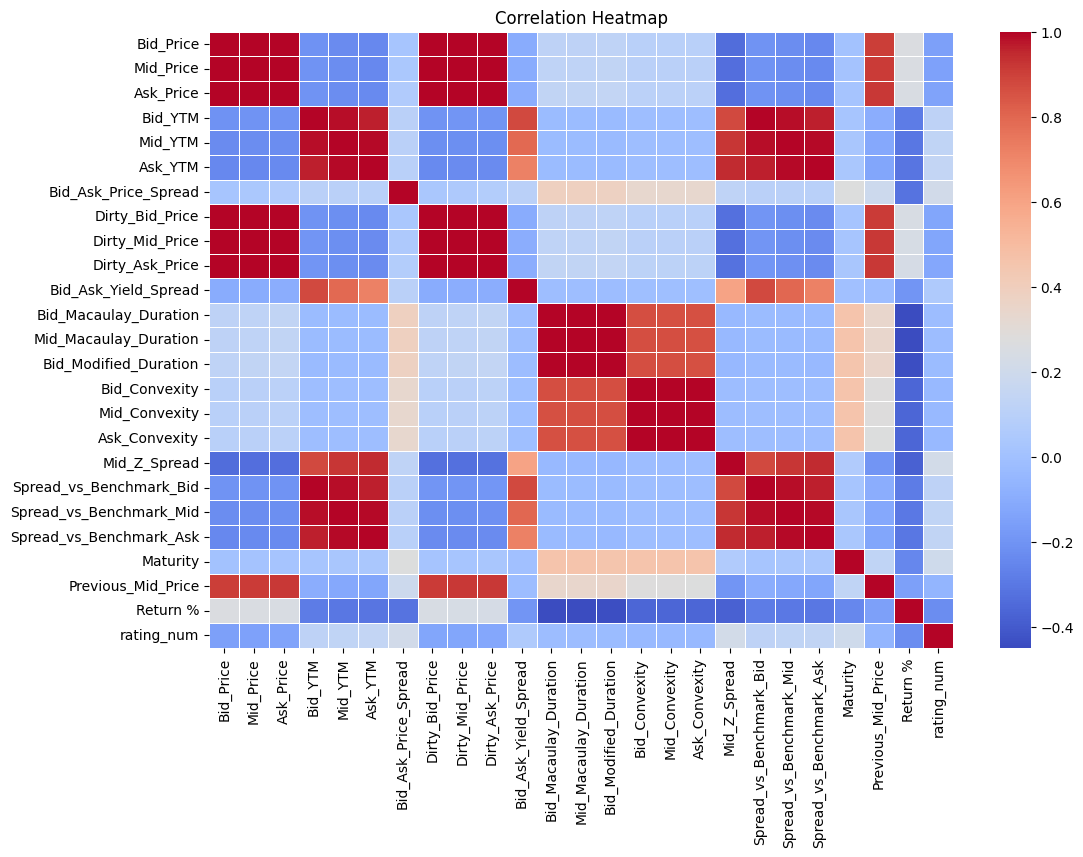

In [31]:
numeric_cols = numeric_bond_data.select_dtypes(include='number')

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## PCA and clustering

In [32]:
numeric_bond_data.T

,9,87,88,2644,2928,2929,2936,2937,3054,3055,...,63517,63518,63519,63520,63521,63522,63523,63524,63525,63527
ISIN,AU0000002073,XS2100005771,XS2100001192,KZ2C00003002,XS2210006339,XS2210002189,USU71000AD25,USU71000AH39,SK4120008871,SK4120009762,...,CA44889ZBQ87,CA44889ZDA18,CA44889ZCN48,CA44889ZDZ68,CA44889ZCK09,CA44889ZBX39,CA44889ZCE49,CA44889ZET99,CA44889ZBU99,CA66989ZEG96
Bid_Price,101.27922,14.12656,97.79,86.17503,70.0,74.71775,100.83144,100.96937,108.14006,117.97468,...,85.83701,145.59286,135.16462,111.66734,121.84502,75.912,67.02671,98.35276,80.13028,102.40605
Mid_Price,101.32972,14.45781,97.815,86.29733,71.365,75.45521,100.83936,100.98512,108.60016,118.64779,...,85.91897,146.20178,135.24504,111.76724,122.04181,76.02661,67.16029,98.48908,80.23067,102.53908
Ask_Price,101.38022,14.78906,97.84,86.41985,72.73,76.19267,100.84728,101.00086,109.063,119.32559,...,86.00102,146.81424,135.32553,111.86726,122.23897,76.14141,67.29416,98.62561,80.3312,102.67236
Bid_YTM,1.39587,556.43932,2.53994,14.41116,1.87531,2.79544,1.72318,2.98375,0.24636,0.88302,...,2.93435,3.44221,3.36471,2.79453,2.92514,3.18848,3.31147,2.82251,3.08934,3.38975
Mid_YTM,1.34106,545.58401,2.53086,14.35008,1.79969,2.75475,1.69392,2.96347,0.07972,0.79046,...,2.91575,3.41605,3.35975,2.75696,2.89654,3.17075,3.29472,2.79231,3.07161,3.38377
Ask_YTM,1.28629,535.10335,2.52179,14.289,1.72564,2.71454,1.66465,2.94318,-0.08692,0.6979,...,2.89714,3.38989,3.35479,2.71938,2.86794,3.15302,3.27798,2.76211,3.05388,3.37779
Bid_Ask_Price_Spread,0.101,0.6625,0.05,0.24482,2.73,1.47492,0.01585,0.03149,0.92294,1.35091,...,0.16401,1.22138,0.16092,0.19993,0.39395,0.22941,0.26746,0.27285,0.20093,0.26631
Dirty_Bid_Price,101.50168,16.75469,97.90027,88.34303,70.34384,74.96015,101.96894,101.89021,109.44383,118.75927,...,85.83701,146.40501,135.97677,114.75435,122.95828,75.912,67.02671,98.58013,80.13028,103.60468
Dirty_Mid_Price,101.55218,17.08594,97.92527,88.46533,71.70884,75.69761,101.97686,101.90595,109.90393,119.43238,...,85.91897,147.01393,136.0572,114.85426,123.15507,76.02661,67.16029,98.71645,80.23067,103.73771


In [33]:
print(numeric_bond_data.columns)

Index(['ISIN', 'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM',
       'Ask_YTM', 'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return %',
       'rating_num'],
      dtype='object')


In [36]:
col_names = [
    'ISIN', 'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM',
       'Ask_YTM', 'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return %'
]

feats = numeric_bond_data[col_names].copy().dropna().reset_index(drop=True)

feats.T

,0,1,2,3,4,5,6,7,8,9,...,23075,23076,23077,23078,23079,23080,23081,23082,23083,23084
ISIN,AU0000002073,XS2100005771,XS2100001192,KZ2C00003002,XS2210006339,XS2210002189,USU71000AD25,USU71000AH39,SK4120008871,SK4120009762,...,CA44889ZBQ87,CA44889ZDA18,CA44889ZCN48,CA44889ZDZ68,CA44889ZCK09,CA44889ZBX39,CA44889ZCE49,CA44889ZET99,CA44889ZBU99,CA66989ZEG96
Bid_Price,101.27922,14.12656,97.79,86.17503,70.0,74.71775,100.83144,100.96937,108.14006,117.97468,...,85.83701,145.59286,135.16462,111.66734,121.84502,75.912,67.02671,98.35276,80.13028,102.40605
Mid_Price,101.32972,14.45781,97.815,86.29733,71.365,75.45521,100.83936,100.98512,108.60016,118.64779,...,85.91897,146.20178,135.24504,111.76724,122.04181,76.02661,67.16029,98.48908,80.23067,102.53908
Ask_Price,101.38022,14.78906,97.84,86.41985,72.73,76.19267,100.84728,101.00086,109.063,119.32559,...,86.00102,146.81424,135.32553,111.86726,122.23897,76.14141,67.29416,98.62561,80.3312,102.67236
Bid_YTM,1.39587,556.43932,2.53994,14.41116,1.87531,2.79544,1.72318,2.98375,0.24636,0.88302,...,2.93435,3.44221,3.36471,2.79453,2.92514,3.18848,3.31147,2.82251,3.08934,3.38975
Mid_YTM,1.34106,545.58401,2.53086,14.35008,1.79969,2.75475,1.69392,2.96347,0.07972,0.79046,...,2.91575,3.41605,3.35975,2.75696,2.89654,3.17075,3.29472,2.79231,3.07161,3.38377
Ask_YTM,1.28629,535.10335,2.52179,14.289,1.72564,2.71454,1.66465,2.94318,-0.08692,0.6979,...,2.89714,3.38989,3.35479,2.71938,2.86794,3.15302,3.27798,2.76211,3.05388,3.37779
Bid_Ask_Price_Spread,0.101,0.6625,0.05,0.24482,2.73,1.47492,0.01585,0.03149,0.92294,1.35091,...,0.16401,1.22138,0.16092,0.19993,0.39395,0.22941,0.26746,0.27285,0.20093,0.26631
Dirty_Bid_Price,101.50168,16.75469,97.90027,88.34303,70.34384,74.96015,101.96894,101.89021,109.44383,118.75927,...,85.83701,146.40501,135.97677,114.75435,122.95828,75.912,67.02671,98.58013,80.13028,103.60468
Dirty_Mid_Price,101.55218,17.08594,97.92527,88.46533,71.70884,75.69761,101.97686,101.90595,109.90393,119.43238,...,85.91897,147.01393,136.0572,114.85426,123.15507,76.02661,67.16029,98.71645,80.23067,103.73771


In [37]:
scaled = StandardScaler().fit_transform(feats.iloc[:, 1:])
pca = PCA(n_components=3).fit_transform(scaled)


In [38]:
thresh = 0.85
pcatest = PCA(0.85).fit_transform(scaled)
rows = pcatest.shape[1]
print(f"We explain {100*thresh}% of the data with {rows} components")

We explain 85.0% of the data with 3 components


In [39]:
scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit(scaled)
    scores.append([i, clusters.inertia_])

In [40]:
pd.DataFrame(scores, columns=["#cluster", "score"]).plot(x="#cluster", y="score")

We see 6 is good on the elbow plot.

In [41]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit(scaled)


In [42]:
pd.Series(clusters.labels_).value_counts()


,count
4,17631
2,2959
0,2112
3,369
1,12
5,2


In [43]:
viz_data = pd.DataFrame(pca, columns=["x", "y", "z"])
viz_data["c"] = clusters.labels_
viz_data["ISIN"] = feats["ISIN"]
viz_data = viz_data.merge(feats, on="ISIN", how="left")


In [44]:
viz_data

,x,y,z,c,ISIN,Bid_Price,Mid_Price,Ask_Price,Bid_YTM,Mid_YTM,...,Bid_Convexity,Mid_Convexity,Ask_Convexity,Mid_Z_Spread,Spread_vs_Benchmark_Bid,Spread_vs_Benchmark_Mid,Spread_vs_Benchmark_Ask,Maturity,Previous_Mid_Price,Return %
0,0.200577,-1.780394,0.978061,4,AU0000002073,101.27922,101.32972,101.38022,1.39587,1.34106,...,1.34876,1.34950,1.35024,18.81055,31.59785,28.98544,26.37600,340,102.68527,-1.320102
1,30.639938,6.507739,1.267709,3,XS2100005771,14.12656,14.45781,14.78906,556.43932,545.58401,...,0.06949,0.07165,0.07383,26027.20629,55401.51907,54316.41442,53268.77474,283,23.98490,-39.721200
2,0.530170,-1.475389,0.208464,4,XS2100001192,97.79000,97.81500,97.84000,2.53994,2.53086,...,10.91304,10.91501,10.91698,-18.84973,6.52663,7.06693,7.60755,1077,100.66900,-2.835034
3,2.109028,-1.879866,-0.990240,4,KZ2C00003002,86.17503,86.29733,86.41985,14.41116,14.35008,...,7.16790,7.17297,7.17805,106.55136,317.87473,313.37473,308.87473,1003,92.32912,-6.532923
4,1.426434,8.053852,-10.089996,0,XS2210006339,70.00000,71.36500,72.73000,1.87531,1.79969,...,727.64267,729.81589,731.93739,71.80675,123.25183,115.84297,108.59098,10345,90.56000,-21.195892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,2.973135,-1.398076,-3.425521,4,CA44889ZBX39,75.91200,76.02661,76.14141,3.18848,3.17075,...,1.88461,1.88267,1.88073,23.22863,75.99052,74.49052,72.99052,3212,82.52354,-7.872820
23081,3.905743,-1.145099,-5.070409,4,CA44889ZCE49,67.02671,67.16029,67.29416,3.31147,3.29472,...,0.77720,0.77594,0.77469,28.98933,83.04627,81.54627,80.04627,4489,74.63534,-10.015430
23082,0.333435,-0.740674,-0.039047,4,CA44889ZET99,98.35276,98.48908,98.62561,2.82251,2.79231,...,24.37052,24.37933,24.38813,-7.57722,38.86651,36.36651,33.86651,1796,105.13957,-6.325392
23083,2.526034,-1.490906,-2.663087,4,CA44889ZBU99,80.13028,80.23067,80.33120,3.08934,3.07161,...,0.65331,0.65275,0.65218,16.44649,66.07623,64.57623,63.07623,2663,86.39647,-7.136634


In [46]:
viz_data.groupby("c")[[
    'Bid_Price', 'Mid_Price', 'Ask_Price', 'Bid_YTM', 'Mid_YTM',
       'Ask_YTM', 'Bid_Ask_Price_Spread', 'Dirty_Bid_Price', 'Dirty_Mid_Price',
       'Dirty_Ask_Price', 'Bid_Ask_Yield_Spread', 'Bid_Macaulay_Duration',
       'Mid_Macaulay_Duration', 'Bid_Modified_Duration', 'Bid_Convexity',
       'Mid_Convexity', 'Ask_Convexity', 'Mid_Z_Spread',
       'Spread_vs_Benchmark_Bid', 'Spread_vs_Benchmark_Mid',
       'Spread_vs_Benchmark_Ask', 'Maturity', 'Previous_Mid_Price', 'Return %'
]].mean().T


c,0,1,2,3,4,5
Bid_Price,95.978119,16.244612,122.297829,38.373308,98.806332,5.000000
Mid_Price,96.362095,17.007849,122.678784,39.043865,98.948883,7.500000
Ask_Price,96.748420,17.771088,123.061294,39.714700,99.091625,10.000000
Bid_YTM,3.514197,1599.723894,3.395838,66.942220,2.818639,5933.141210
Mid_YTM,3.488861,1490.248523,3.362542,64.887866,2.738857,4175.156140
Ask_YTM,3.463598,1405.327272,3.329427,63.248987,2.660097,3181.097230
Bid_Ask_Price_Spread,0.770301,1.526475,0.763465,1.341392,0.285293,5.000000
Dirty_Bid_Price,96.827355,18.241273,123.883281,39.437470,99.593450,6.506250
Dirty_Mid_Price,97.211331,19.004510,124.264236,40.108027,99.736001,9.006250
Dirty_Ask_Price,97.597656,19.767748,124.646746,40.778861,99.878743,11.506250


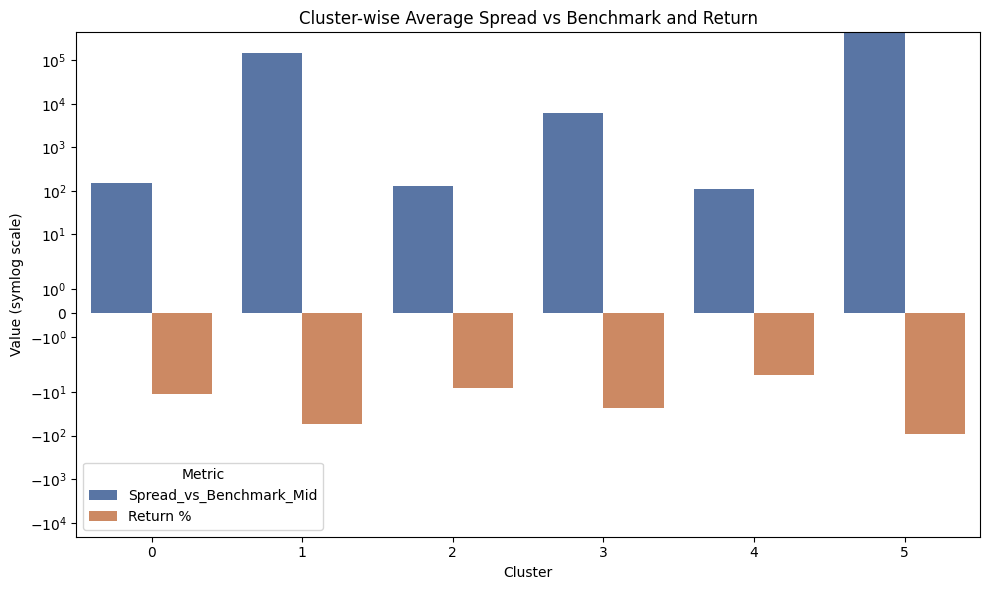

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by cluster label 'c' and compute means
cluster_means = viz_data.groupby("c")[["Spread_vs_Benchmark_Mid", "Return %"]].mean().reset_index()

# Melt the dataframe for grouped barplot
df_melted = cluster_means.melt(id_vars="c",
                               value_vars=["Spread_vs_Benchmark_Mid", "Return %"],
                               var_name="Metric", value_name="Value")

# Create plot with log-scaled y-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="c", y="Value", hue="Metric", palette="deep")
plt.yscale("symlog")  # handles both positive and negative values
plt.xlabel("Cluster")
plt.ylabel("Value (symlog scale)")
plt.title("Cluster-wise Average Spread vs Benchmark and Return")
plt.legend(title="Metric")
plt.tight_layout()
plt.savefig("cluster_barplot.png", dpi=300)
plt.show()


In [48]:
fig = px.scatter_3d(viz_data, x="x", y="y", z="z", color="c", size_max=10, opacity=0.8)
fig.update_traces(marker_size=6)
fig.show()

## non-numeric columns

In [49]:
# get non numeric columns
non_numeric_columns = bond_data.select_dtypes(exclude=["number"]).columns
print(non_numeric_columns)

# analysis on non numeric columns

# get counts for each non numeric column
non_numeric_counts = bond_data[non_numeric_columns].nunique()
print(f"Non numeric column counts: {non_numeric_counts}")


Index(['ISIN', 'CUSIP', 'Ticker', 'Short_name_of_Issuer', 'Currency', 'Tier',
       'Coupon_Type', 'Defaulted', 'Perpetual', 'isCallable', 'Liquidity_asof',
       'MOODYS', 'SNP', 'instrumentRating.directionOfChange.MOODYS',
       'instrumentRating.directionOfChange.SNP'],
      dtype='object')
Non numeric column counts: ISIN                                         23552
CUSIP                                        23552
Ticker                                        3271
Short_name_of_Issuer                          3271
Currency                                        27
Tier                                             7
Coupon_Type                                      3
Defaulted                                        1
Perpetual                                        2
isCallable                                       2
Liquidity_asof                                   1
MOODYS                                          78
SNP                                             21
instrumentR